In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_excel('data_set_17.xlsx')
from scipy.optimize import curve_fit


In [2]:
print (data.columns)
print (data['industrydiversity'])

Index(['globalcompanykey', 'datadate', 'datayearfiscal', 'companylegalname',
       'assetstotal', 'employees', 'salesturnovernet', 'advertisingexpense',
       'rnd', 'compustatid',
       ...
       'lsellingexp', 'ladvertisingexpense', 'lreceivablestotal', 'u_h1',
       'debteratio', 'company_counter ', 'yr_counter', 'yr_counter_ref',
       'yr_counter2', 'company_counter'],
      dtype='object', length=132)
0       0.000000
1       0.277778
2       0.786389
3       0.861488
4       0.870800
          ...   
1011    0.907523
1012    0.908678
1013    0.908028
1014    0.907290
1015    0.908560
Name: industrydiversity, Length: 1016, dtype: float64


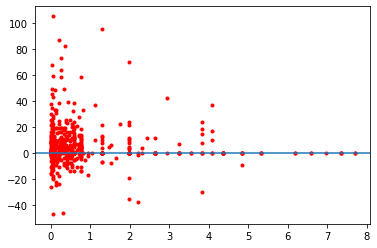

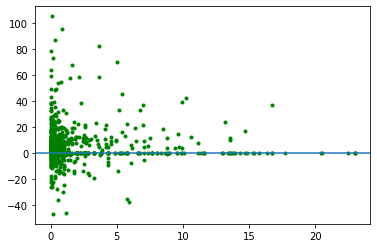

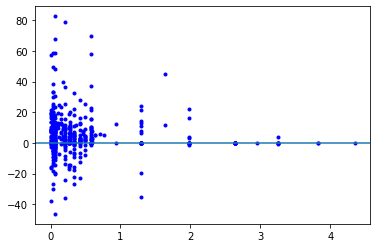

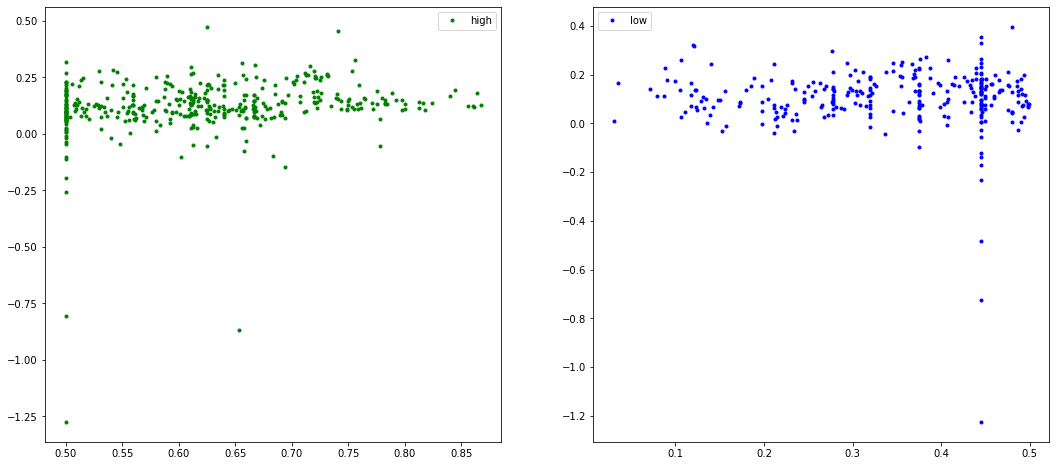

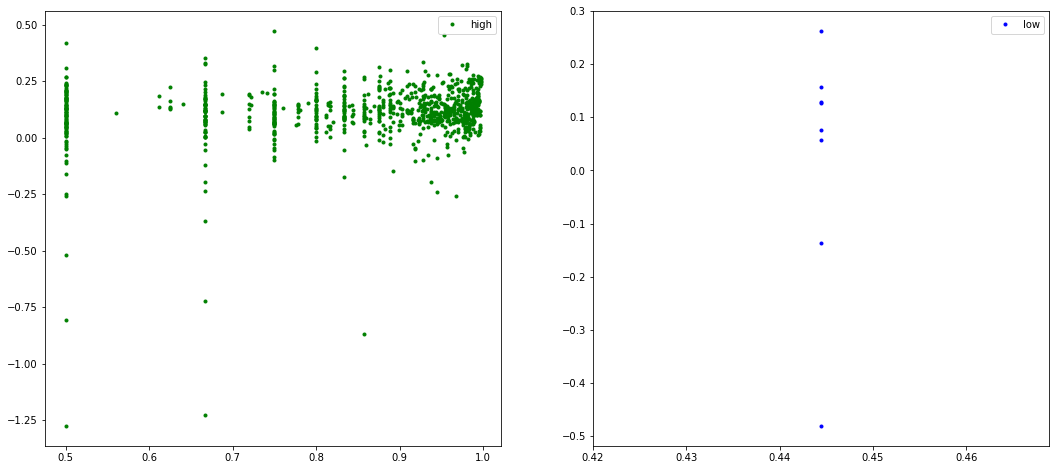

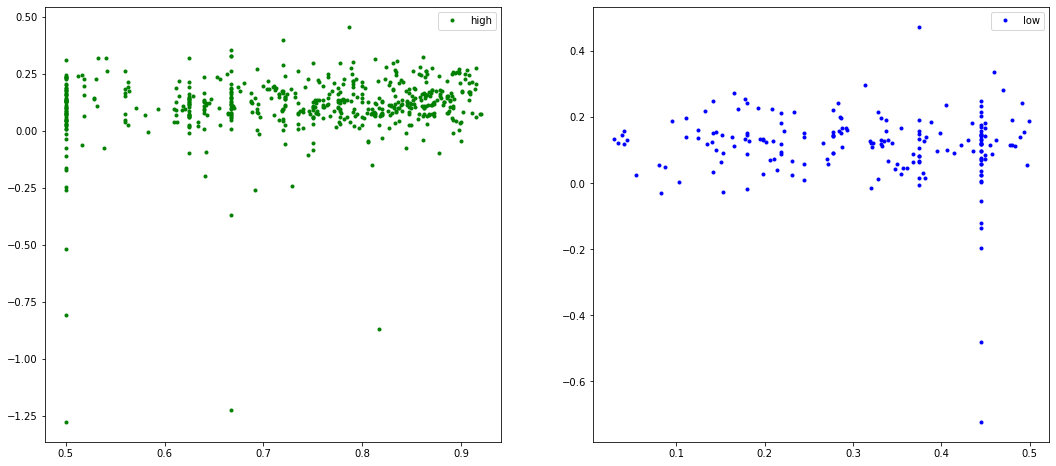

In [4]:
#plt.plot(data['technicaldiversity']**2, data['operatingincometotalassets'], '.')
#plt.show()

data['technicaldiversityhighlow']
type_div = ['technicaldiversity', 'organizationaldiversity', 'industrydiversity']
type_div_hl = ['technicaldiversityhighlow', 'organizationaldiversityhighlow', 'industrydiversityhighlow']



cond1 = (data['entropyindustrylaurens']!=1) &  (data['entropyindustrylaurens']!=0)
cond2 = (data['entropyorganizationallaurens']!=1) & (data['entropyorganizationallaurens']!=0)
cond3 = (data['entropytechnicallaurens']!=1) & (data['entropytechnicallaurens']!=0)

plt.plot(data['entropyindustrylaurens'][cond1]**2, data['growth'][cond1], '.', color = 'r')
plt.axhline(y=0.0)

plt.figure()
plt.plot(data['entropyorganizationallaurens'][cond2]**2, data['growth'][cond2], '.', color = 'g')
plt.axhline(y=0.0)

plt.figure()



plt.plot(data['entropytechnicallaurens'][cond3]**2, data['growth'][cond3], '.', color = 'b')
plt.axhline(y=0.0)


for ii, td in enumerate(type_div):
    fig, ax = plt.subplots(1,2 , figsize = (18, 8))
    cond_high = (data[td]!=0.0) & (data['operatingincometotalassets']!=0) & (data[type_div_hl[ii]]=='HIGH')
    cond_low = (data[td]!=0.0) & (data['operatingincometotalassets']!=0) & (data[type_div_hl[ii]]=='LOW')

    ax[0].plot(data[td][cond_high], data['operatingincometotalassets'][cond_high], '.', color = 'g', label = 'high')
    ax[1].plot(data[td][cond_low], data['operatingincometotalassets'][cond_low], '.', color = 'b', label = 'low')
    ax[0].legend()
    ax[1].legend()
    plt.show()

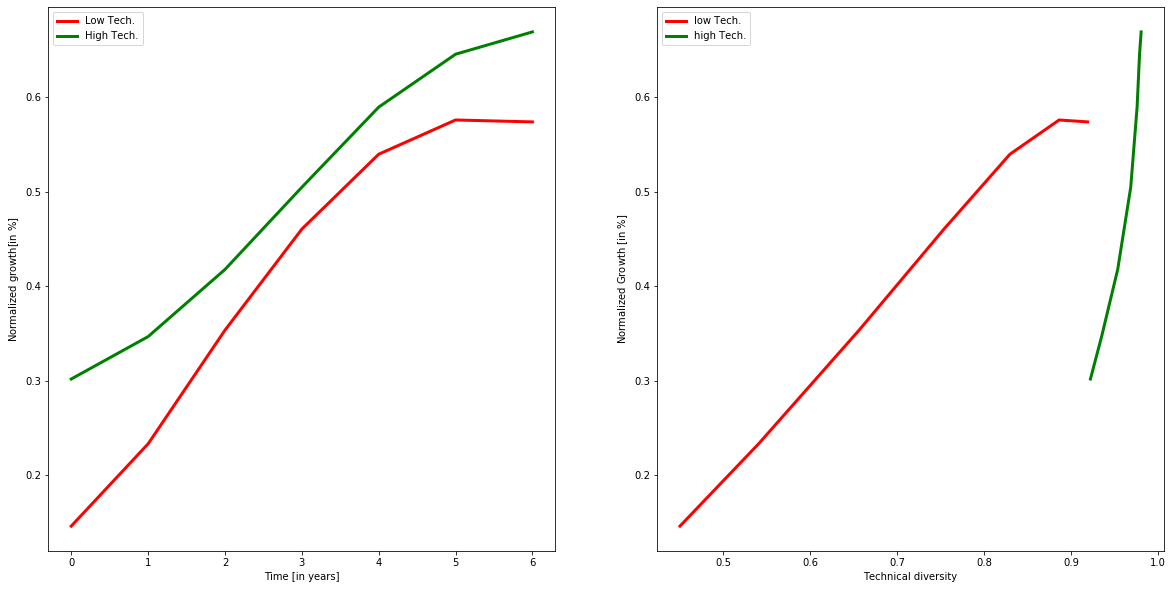

In [5]:
from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots(1,2, figsize = (20, 10))

def plotting(param, n_min, n_max, ii, ls):
    ii = 0 
    means = {'low':[],'high':[] }
    tech = {'year':[], 'low': [], 'high':[]}
    for i in range(n_min, n_max):
        cond_low = (data['yr_counter2'] == i) &  (data['technicaldiversityhighlow']=='LOW') 
        cond_high =  (data['yr_counter2'] == i) & (data['technicaldiversityhighlow']=='HIGH') 
        cond_count = (data['yr_counter2'] == i) 
        #cond_count = cond_low
        
        y_low = np.nanmean(data['growth'][cond_low])
        y_high = np.nanmean(data['growth'][cond_high])

        y_tech_low = np.nanmean(data[param][cond_low])
        y_tech_high = np.nanmean(data[param][cond_high])
        
        y_low_err = np.std(data['growth'][cond_low])
        y_high_err = np.std(data['growth'][cond_high])
        y_tech_low_err = np.std(data[param][cond_low])
        y_tech_high_err = np.std(data[param][cond_high])

        means['low'].append(y_low)
        means['high'].append(y_high)
        tech['low'].append(y_tech_low)
        tech['high'].append(y_tech_high)
        tech['year'].append(i)
        #ax[0].errorbar(i, y_low, y_low_err, color = 'r')
        #ax[1].errorbar(i, y_tech_low, y_tech_low_err, color = 'r')
            #ax.errorbar(i, y_high,  abs(y_high)/np.sqrt(n_high),  color = 'g')
        ############## test
        #print (i, y_high, y_tech_high)
        #print (i, y_low, y_tech_low)

    ax[ii].plot(tech['year'], gaussian_filter1d(means['low'], sigma = 1.5)/max(means['low']), color = 'r', label = 'Low Tech.', lw = 3.0)
    ax[ii].plot(tech['year'], gaussian_filter1d(means['high'], sigma = 1.5)/max(means['high']), color = 'g', label = 'High Tech.', lw = 3.0)
    
    
    #ax[ii].plot(tech['year'], gaussian_filter1d(tech['low'], sigma =1.5)/max(tech['low']), color = 'r', ls = ls, label = 'low, %s'%(param[0:4]))
    #ax[ii].plot(tech['year'], gaussian_filter1d(tech['high'], sigma =1.5)/max(tech['high']), color = 'g', ls  = ls,label = 'high, %s'%(param[0:4]))

    #ax.plot(data['yr_counter'][cond_high], data['growth'][cond_high], '.', color = 'r')
    #ax.plot(data['yr_counter2'][cond_low], data['growth'][cond_low], '.', color = 'g' )
    #if ii!=0:
    ax[ii].legend()
    ax[ii].set_xlabel('Time [in years]')
    ax[ii].set_ylabel('Normalized growth[in $\%$]')
    #ax[1].plot(gaussian_filter1d(tech['low'], sigma =1.5)/max(tech['low']), )
    return tech, means
tech, means = plotting('technicaldiversity', 0, 7, 0, '--' )
colors = ['r', 'g']
for jj, type_tech in enumerate(['low', 'high']):
    
    ax[1].plot(gaussian_filter1d(tech[type_tech], sigma = 1.5)/max(tech[type_tech]),\
               gaussian_filter1d(means[type_tech], sigma = 1.5)/max(means[type_tech]),  color= colors[jj],\
               label = '%s Tech.'%(type_tech), lw = 3.0)
    ax[1].legend()
    ax[1].set_xlabel('Technical diversity')
    ax[1].set_ylabel('Normalized Growth [in $\%$]')
plt.rcParams.update({'font.size': 22})

fig.savefig('tech_div_trends.png', dvi = 400)
plt.show()
    

In [6]:
u_h3, means = plotting('u_h3', 0, 7, 0, '-')
def cross_plot(type_tech, color):
    
    cross = [gaussian_filter1d(tech[type_tech], sigma = 1.5)[jj]* gaussian_filter1d(u_h3[type_tech], sigma = 1.5)[jj] for jj in range(len (tech['year']))]
    ax[1].plot(tech['year'], cross, label = type_tech, color = color)
    ax[1].legend()

cross_plot('low', 'r')
cross_plot('high', 'g')
plt.show()

In [7]:
ax[1].plot( gaussian_filter1d(tech['low'], sigma = 1.5), gaussian_filter1d(means['low'], sigma =1.5), '.', markersize = 20, color = 'r')
#ax[1].plot( gaussian_filter1d(tech['high'], sigma = 1.5), gaussian_filter1d(means['high'], sigma =1.5), '.', markersize = 20, color = 'g')
def fitting(type_tech):
    y1 = gaussian_filter1d(means[type_tech], sigma =1.5)
    x1 = gaussian_filter1d(tech[type_tech], sigma =1.5)
    popt, pcov = curve_fit(func, x1,y1)
    print ('%s : a = %s, b = %s, c = %s'%(type_tech, popt[0], popt[1], popt[2]))

    return popt, x1, y1, 

def func(x, a, b, c):
    return a*x**2 + b*x + c

params_fit, x1, y1 = fitting('low')
print (params_fit)
ax[1].plot(x1, func(np.array(x1), *params_fit ), '-')
ax[1].set_xlim(0, 0.8)
ax[1].set_ylim(0, 8)

params_fit = fitting('high')

#ax[1].plot( tech['high'], means['high'], '.', markersize = 20, color = 'b')

#plotting('advertisingexpense', 0, 7, 0, '-.')
plotting('u_h3', 0, 7, 0, '-')
plt.show()

low : a = -107.24724080367609, b = 89.16023496927245, c = -6.824123315790819
[-107.2472408    89.16023497   -6.82412332]
high : a = 2615.6250213376347, b = -3106.7403596199397, c = 925.8611268741206


TypeError: expected non-empty vector for x

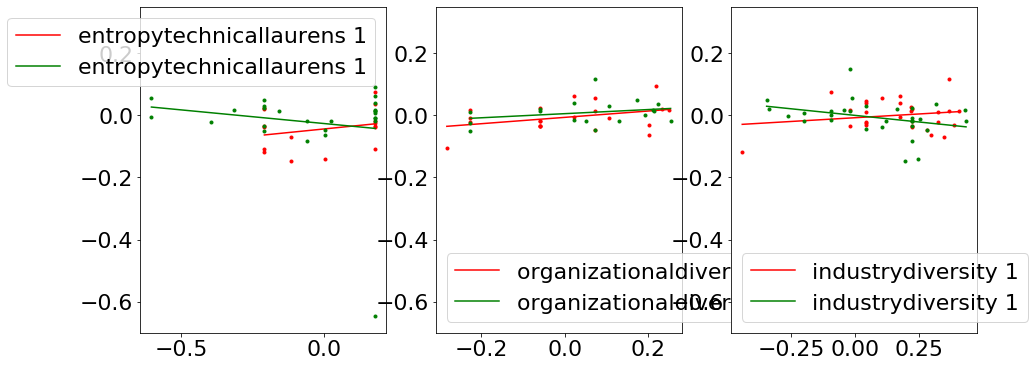

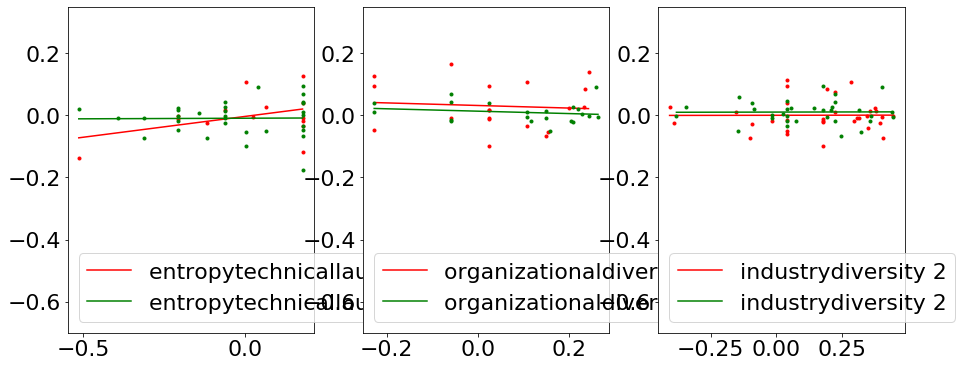

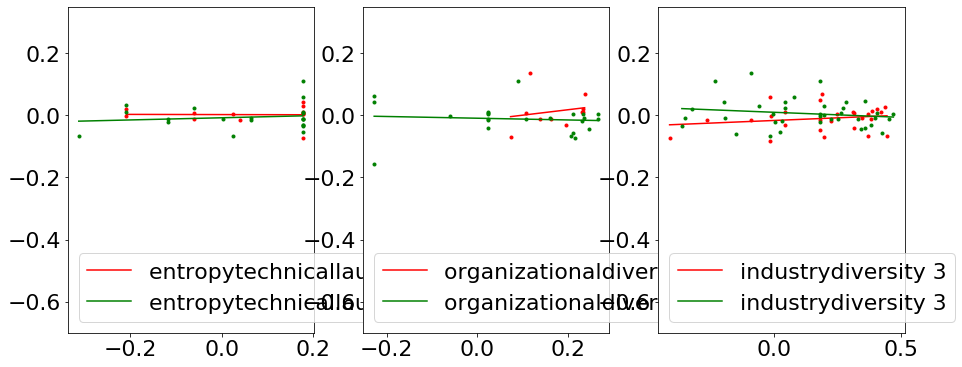

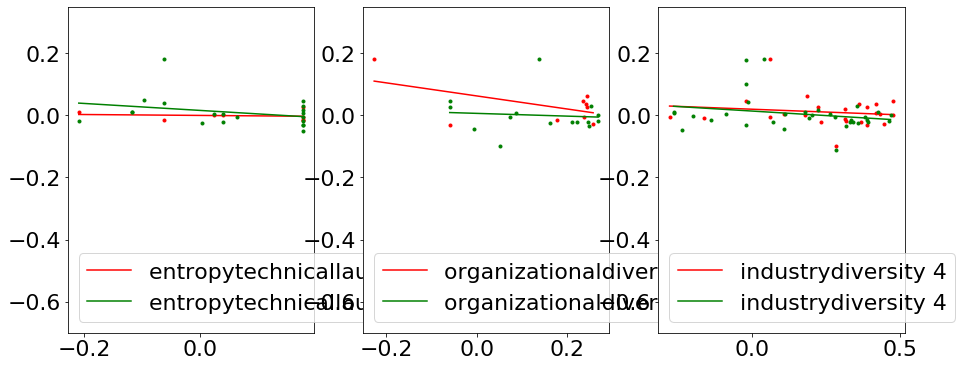

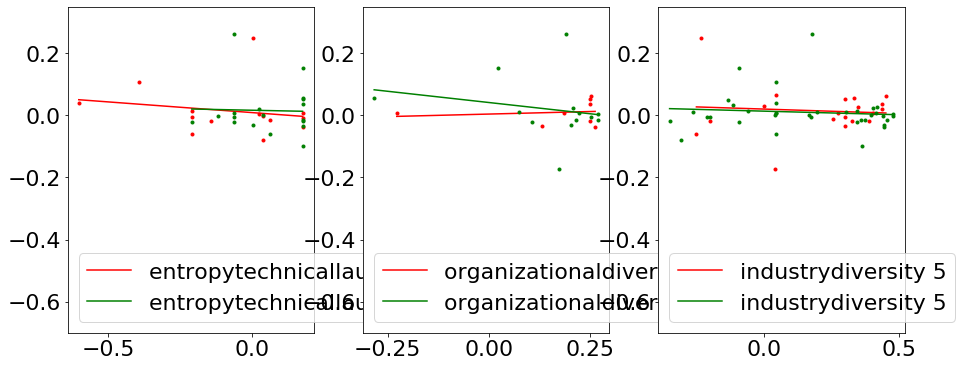

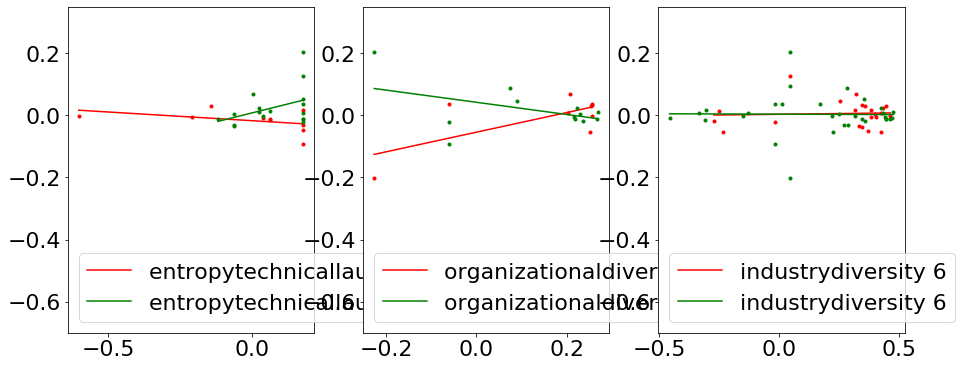

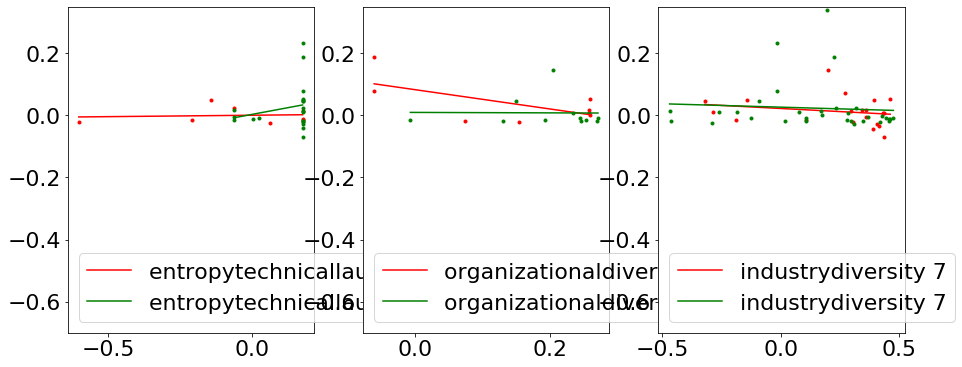

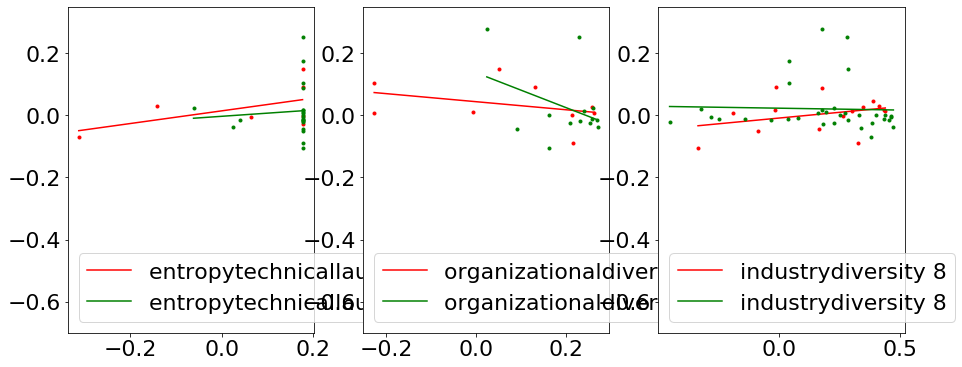

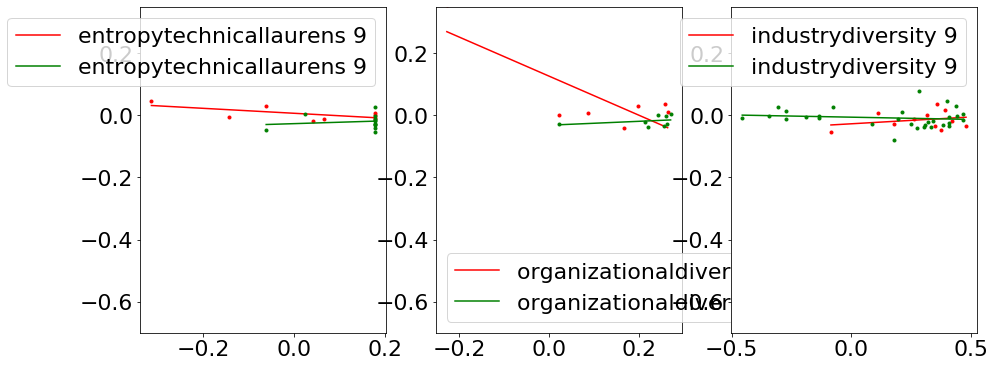

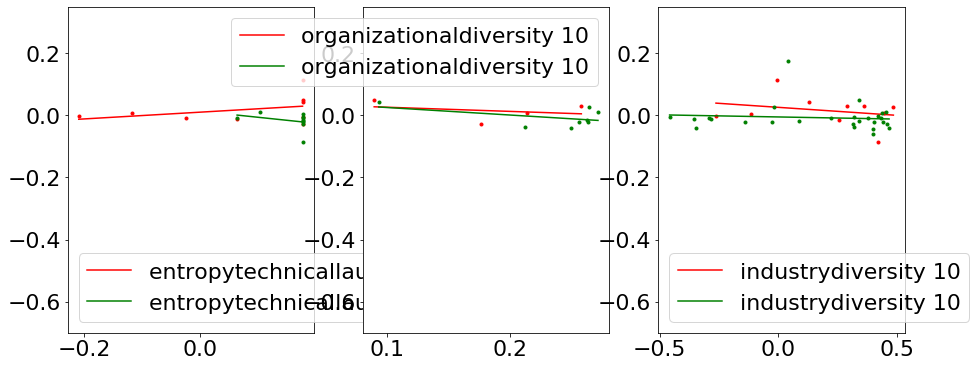

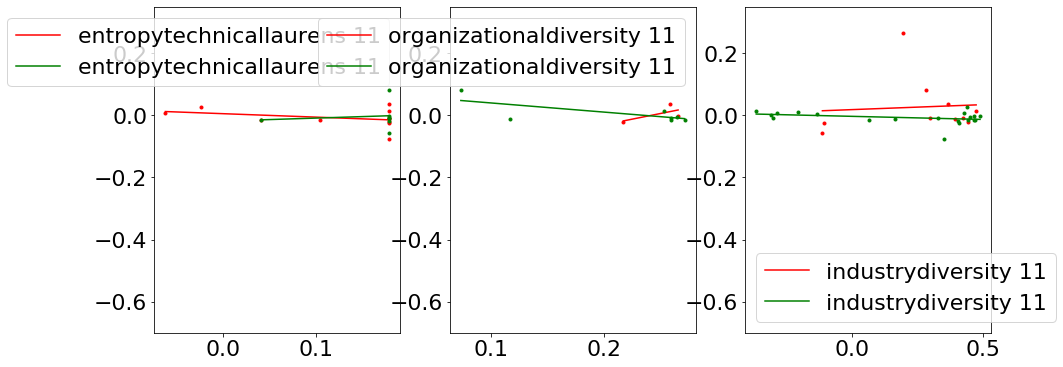

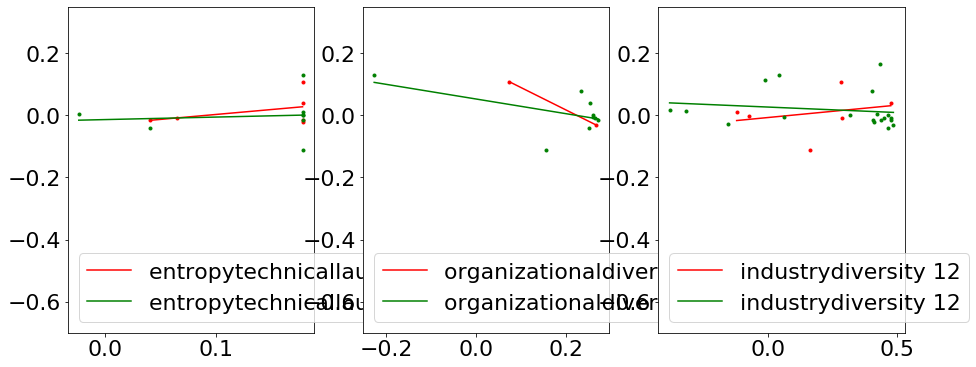

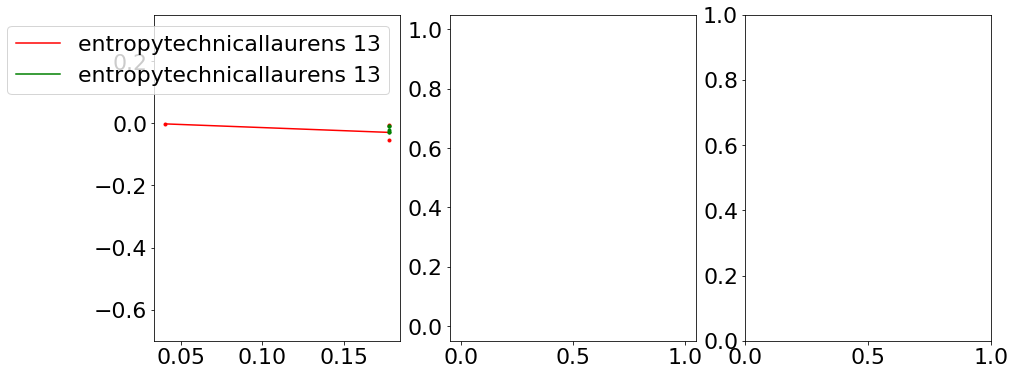

In [9]:
import warnings
warnings.filterwarnings('ignore')
def properties(data, key):
    key_new = key+'highlow'
    mean = np.mean(data[key])
    data[key_new] = np.zeros((len(data)))
    data[key_new][data[key]<mean] = 'LOW'
    data[key_new][data[key]>mean] = 'HIGH'
    return data, key_new

def normalization(data, key):
    key_new = key+ '_norm'
    data[key_new] = (data[key]- np.mean(data[key]))/ (np.max(data[key]) - np.min(data[key]))
    return data
#technicaldiversity
#data['entropytechnicallaurens']
div_dict = {'div1': ['entropytechnicallaurens', 'u_h3'],\
            'div2': ['organizationaldiversity', 'u_h1'],\
            'div3': ['industrydiversity', 'u_h2'],}

color = ['r', 'g']
ls = ['-', '.-', '--']
#data['operatingincometotalassets']
for kk in range( 1, 15):
    fig, ax = plt.subplots(1,3, figsize = (15, 6))
    
    for jj in range(3):
        diversity_name = div_dict['div%s'%(jj+1)][0]
        diversity_sfa_var = div_dict['div%s'%(jj+1)][1]
        data = normalization(data, diversity_name)
        data, key_new = properties(data, diversity_sfa_var)
        data = normalization(data, 'growth')


        for ii, cat in enumerate(['HIGH', 'LOW']):

            cond1 = (data[key_new] == cat) &\
            (data[diversity_name +'_norm']!= min(data[diversity_name +'_norm'])) & (data['yr_counter2'] == kk)
            x = data[diversity_name + '_norm'][cond1]
            y = data['growth_norm'][cond1]
            ax[jj].plot( x, y, '.', color = color[ii])

            z = np.polyfit(x, y, 1)
            f = np.poly1d(z)

            x_new = np.linspace(min(x), max(x), 50)
            y_new = f(x_new)
            ax[jj].plot( x_new, y_new, '-', color = color[ii], label = '%s %s'%(diversity_name, kk) )
            ax[jj].set_ylim(-0.7, 0.35)
            ax[jj].legend()
        
    

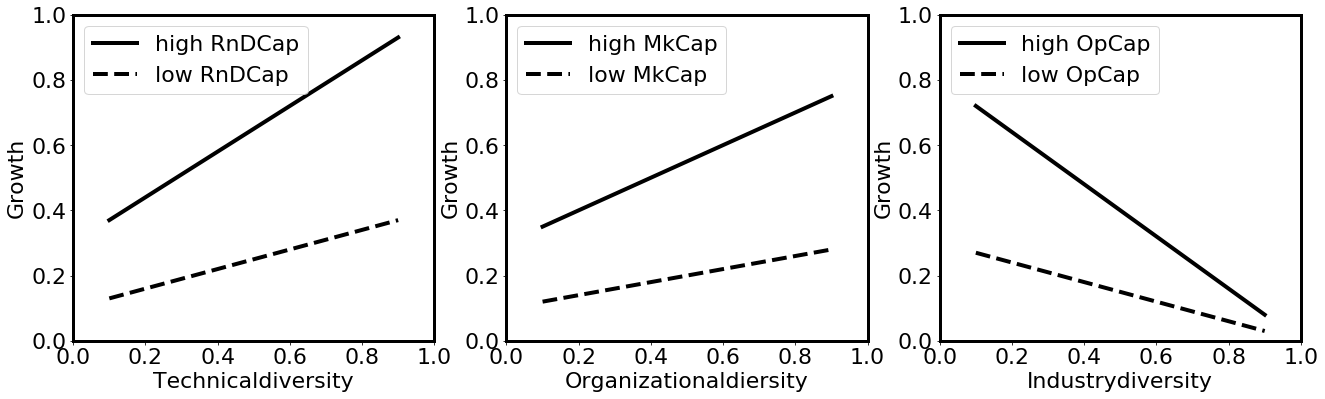

In [15]:
import matplotlib.pylab as pylab

params = {'axes.linewidth' :3}#'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         #'axes.labelsize': 'x-large',
         #'axes.titlesize':'x-large',
         #'xtick.labelsize':'x-large',
         #'ytick.labelsize':'x-large',
          
pylab.rcParams.update(params)

fig, ax = plt.subplots(1, 3, figsize = (22, 6))

x = np.arange(0.1,1,0.1)
fit_data = {'m':{'high':[0.7, 0.5, -0.8], 'low':[0.3,0.2,-0.3]},\
                'c':{'high':[0.3, 0.3, 0.8], 'low':[0.1,0.1, 0.3]}, 'labels':['RnDCap', 'MkCap', 'OpCap'],\
            'title': ['Technicaldiversity','Organizationaldiersity', 'Industrydiversity']}
ls = ['-', '--']
for jj in range(3):
    for ii, cat in enumerate(['high', 'low']):
        
        ax[jj].plot(x, fit_data['m'][cat][jj] * x + fit_data['c'][cat][jj], ls = ls[ii] , color = 'k', lw = 4, \
                   label = '%s %s'%(cat, fit_data['labels'][jj]) )
        ax[jj].set_ylabel('Growth')
        ax[jj].set_xlabel(fit_data['title'][jj])
        
        ax[jj].legend(loc = 'upper left')
        ax[jj].set_ylim(0,1)
        ax[jj].set_xlim(0,1)

fig.savefig('growth_sfa_var.png', dvi = 400)

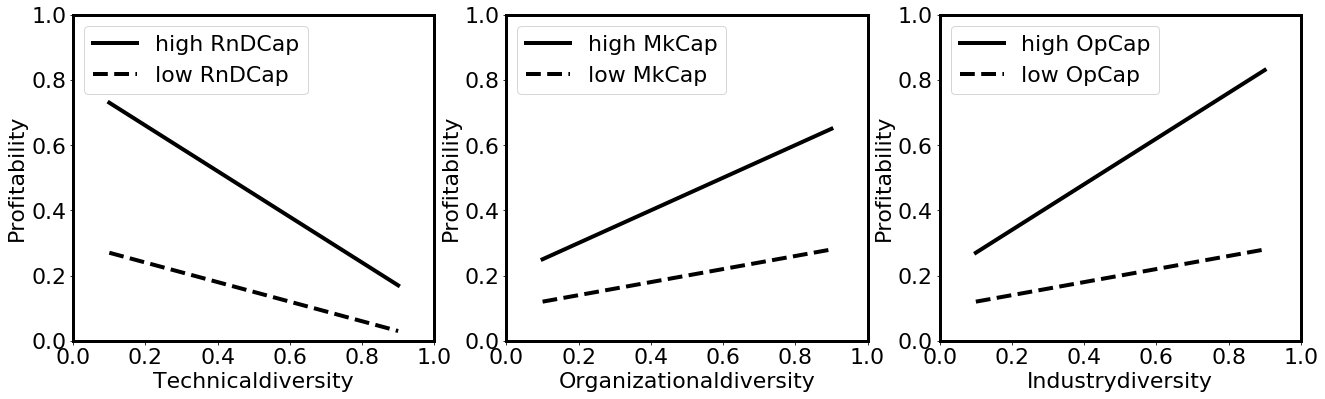

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
'''
fit_data = {'m':{'high':[0.7, 0.5, -0.7], 'low':[0.3,0.2,-0.3]},\
                'c':{'high':[0.3, 0.3, 0.8], 'low':[0.1,0.1, 0.3]}, 'labels':['RnDCap', 'MkCap', 'OpCap'],\
            'title': ['Technicaldiversity','Organizationaldiersity', 'Industrydiversity']}
'''
x = np.arange(0.1,1,0.1)
fit_data = {'m':{'high':[ -0.7, 0.5, 0.7, ], 'low':[-0.3, 0.2,0.2,]},\
                'c':{'high':[0.8, 0.2, 0.2], 'low':[0.3, 0.1,0.1, ]}, 'labels':['RnDCap', 'MkCap', 'OpCap'],\
            'title': ['Technicaldiversity','Organizationaldiversity', 'Industrydiversity']}
ls = ['-', '--']
for jj in range(3):
    for ii, cat in enumerate(['high', 'low']):
        
        ax[jj].plot(x, fit_data['m'][cat][jj] * x + fit_data['c'][cat][jj], ls = ls[ii] , color = 'k', lw = 4, \
                   label = '%s %s'%(cat, fit_data['labels'][jj]) )
        ax[jj].set_ylabel('Profitability')
        ax[jj].set_xlabel(fit_data['title'][jj])
        
        ax[jj].legend(loc = 'upper left')
        ax[jj].set_ylim(0,1)
        ax[jj].set_xlim(0,1)

fig.savefig('profit_sfa_var.png', dvi = 400)
plt.show()

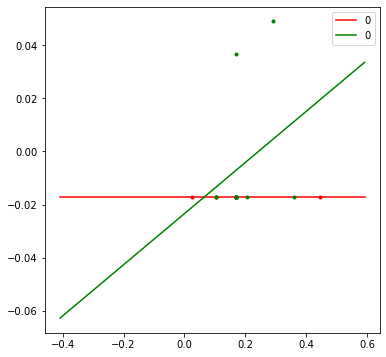

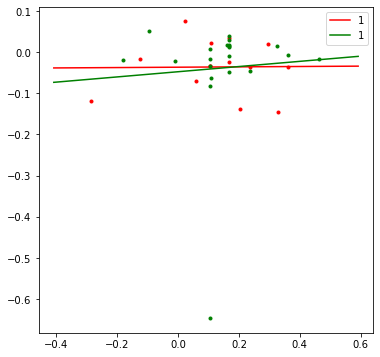

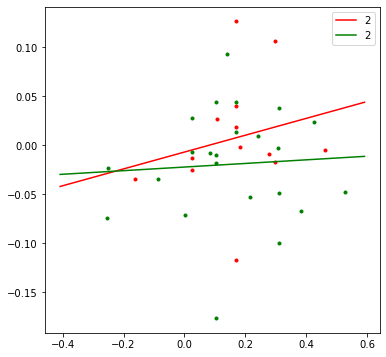

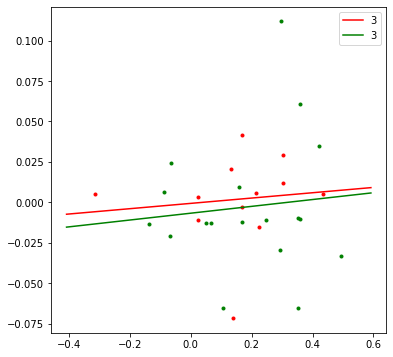

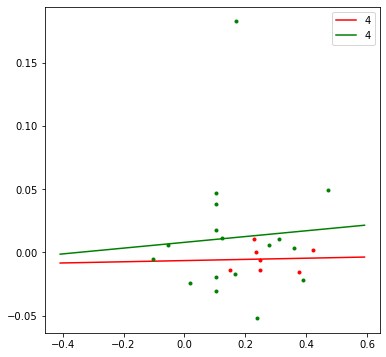

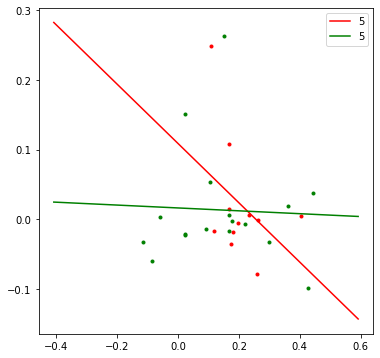

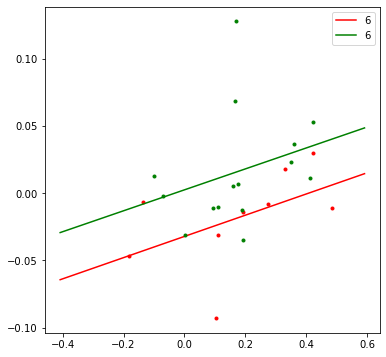

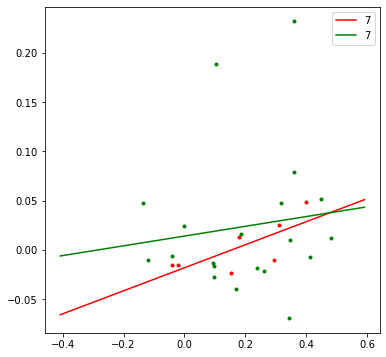

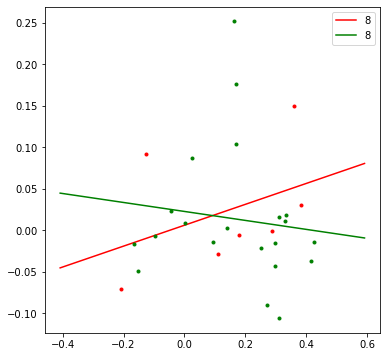

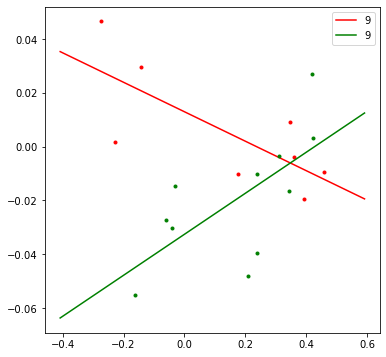

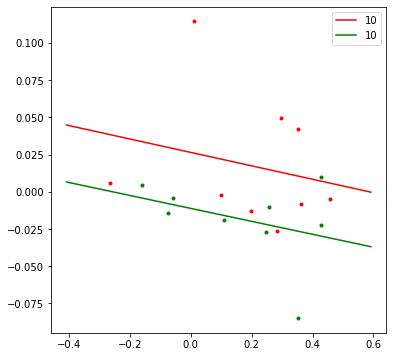

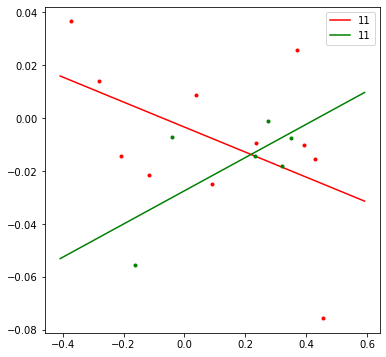

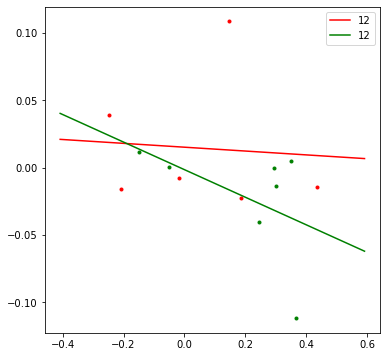

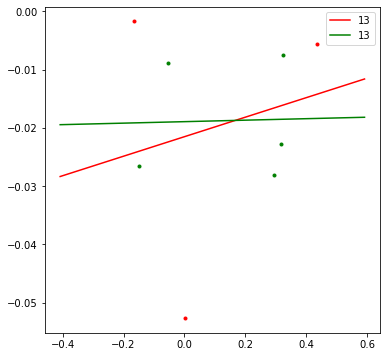

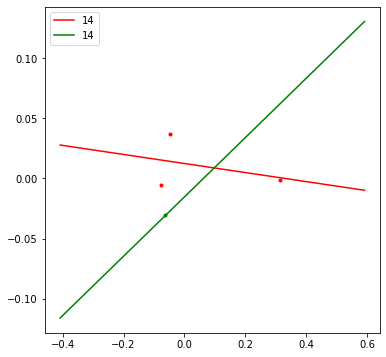

In [107]:



#data['growth_norm'] = data['growth']
def year_num_trend(i, ):
    fig, ax = plt.subplots(1,1, figsize = (6, 6))

    color = ['r', 'g']
    for ii, cat in enumerate(['HIGH', 'LOW']):

        cond1 = (data[key_new] == cat) & (data['technicaldiversity_norm']!= min(data['technicaldiversity_norm'])) & (data['yr_counter2']==i)
        x = data['technicaldiversity_norm'][cond1]
        y = data['growth_norm'][cond1]
        ax.plot( x, y, '.', color = color[ii])

        z = np.polyfit(x, y, 1)
        f = np.poly1d(z)

        x_new = np.linspace(min(data['technicaldiversity_norm']), max(data['technicaldiversity_norm']), 50)
        y_new = f(x_new)
        ax.plot( x_new, y_new, '-', color = color[ii], label = i)
        ax.legend()
        
for i in range(15):
    year_num_trend(i)
plt.show()

[0.032169885057471266, 0.20322836363636362, 0.14531689090909092, 0.19643917647058823, 0.223838825, 0.20978633333333332, 0.2505233636363637]


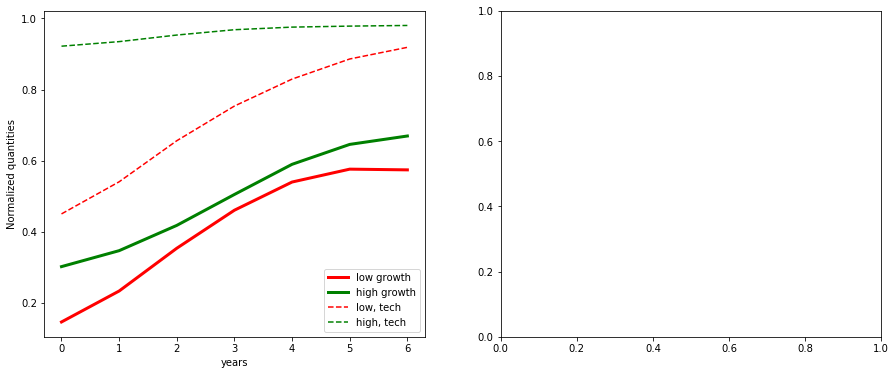

In [72]:
print (tech['low'])
result = curve_fit()
#plotting('technicaldiversity', 7, 15, 1, '--')
#plotting('advertisingexpense', 7, 15, 1, '-.')
#plotting('u_h3', 7, 15, 1, '-')

## conclusions without error

### 0-6 years

* growth increasing in both types of companies
    * tech div increases for both types
        * Rate of increse for low tech companies faster than high tech companies
    * advinvest increase for low tech companies
    * avd. increase for first half then decrease 
    * u_h3 flat for both types 
    
### 7-14 years
* growth is decreasing
    * tech div for low tech increasing
        * tech div for high tech decreasing
    * adinvest increasing for low tech
        * advinvest decreasing for hih tech
    * u)h3 incressing for both, but at faster rate in low tech companies
    


(-50, 50)

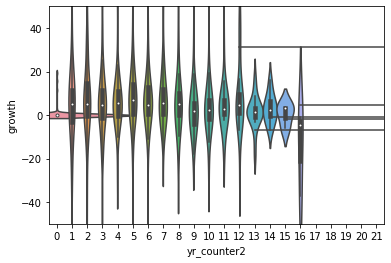

In [22]:
ax = sns.violinplot(x = 'yr_counter2', y = 'growth', data = data, width = 10, orient = 'v')
ax.set_ylim(-50, 50)

In [79]:
print (min(data['yr_counter2']))
print (max(data['yr_counter2']))
print (data['uh3'])

0
21


KeyError: 'uh3'

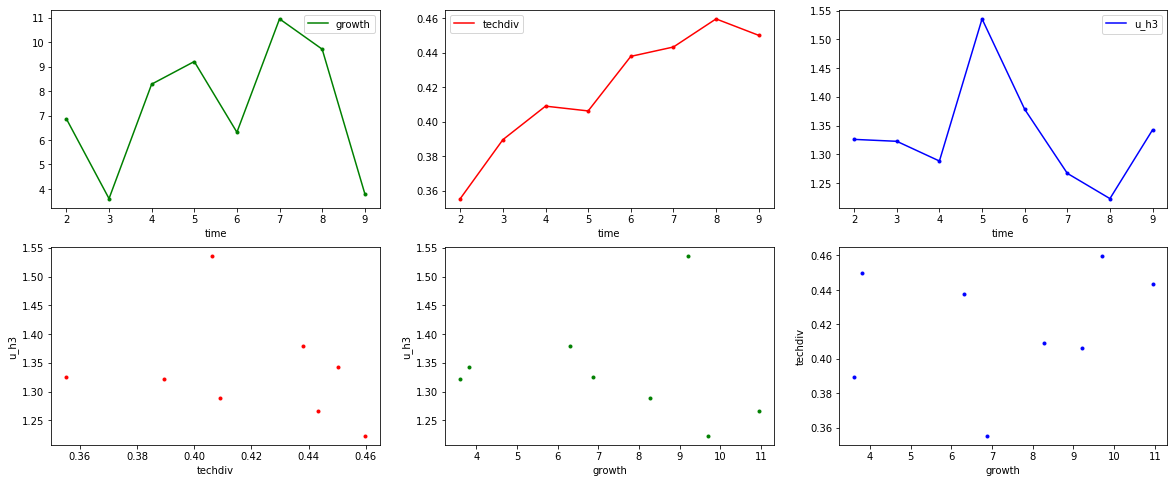

In [103]:
fig, ax = plt.subplots(2,3, figsize = (20, 8))

def plotting_v2():
    means_all ={'growth': [], 'techdiv' :[], 'techdiv_low' :[], 'techdiv_high' :[], 'advt' :[], 'u_h3' :[]} 

    #n_max = max(data['yr_counter2'])
    n_min = 2
    n_max = 10
    for i in range(n_min,n_max ):
        cond_low =(data['technicaldiversityhighlow']=='LOW') & (data['yr_counter2'] == i)
        cond_high = (data['technicaldiversityhighlow']=='HIGH') & (data['yr_counter2'] == i)

        cond = data['yr_counter2'] == i
        means_all['growth'].append(np.mean(data['growth'][cond]))
        means_all['techdiv'].append(np.mean(data['technicaldiversity'][cond]))
        means_all['u_h3'].append(np.mean(data['u_h3'][cond]))

        ms = 100*np.mean(data['technicaldiversity'][cond])
        ms1 = np.mean(data['growth'][cond])
        ax[0][0].plot(i, np.mean(data['growth'][cond]), '.', color = 'g', )#markersize = ms)
        ax[0][1].plot(i, np.mean(data['technicaldiversity'][cond]), '.', color = 'r',) #markersize = ms1)
        ax[0][2].plot(i, np.mean(data['u_h3'][cond]), '.', color = 'b')
    #max(data['yr_counter2'])
    ax[0][0].plot(range(n_min, n_max), means_all['growth'], color = 'g', label = 'growth')
    ax[0][1].plot(range(n_min, n_max), means_all['techdiv'], color = 'r', label = 'techdiv')
    ax[0][2].plot(range(n_min, n_max), means_all['u_h3'], color = 'b', label = 'u_h3')

    #ax.plot(data['yr_counter'][cond_high], data['u_h3'][cond_high], '.', color = 'r')
    #ax.plot(data['yr_counter2'][cond_low], data['growth'][cond_low], '.', color = 'g' )
    ax[1][0].plot(means_all['techdiv'], means_all['u_h3'] , 'r.',)
    ax[1][0].set_xlabel('techdiv')
    ax[1][0].set_ylabel('u_h3')

    ax[1][1].plot(means_all['growth'], means_all['u_h3'] , 'g.', )
    ax[1][1].set_xlabel('growth')
    ax[1][1].set_ylabel('u_h3')

    ax[1][2].plot(means_all['growth'], means_all['techdiv'] , 'b.',)
    
    ax[1][2].set_xlabel('growth')
    ax[1][2].set_ylabel('techdiv')

    
    ax[0][0].legend()
    ax[0][1].legend()
    ax[0][2].legend()

    [ax[0][ii].set_xlabel('time') for ii in range(3)]
    plt.show()
    
plotting_v2()

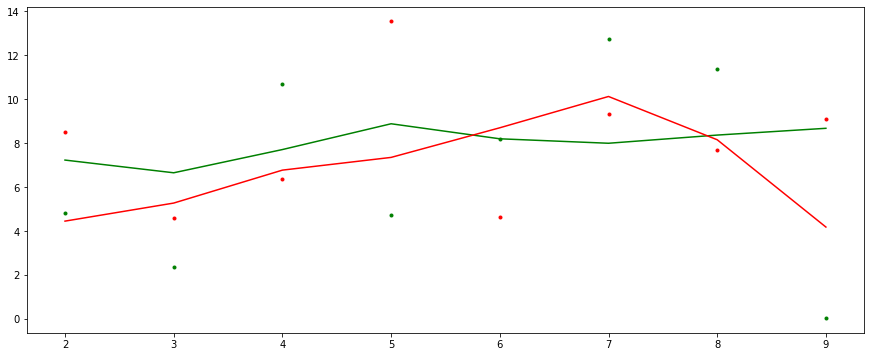

In [120]:
fig, ax = plt.subplots(1,1 , figsize = (15, 6))
from scipy.ndimage.filters import gaussian_filter1d

#ysmoothed = gaussian_filter1d(y, sigma=2)
def plotting_v3():
    means_all ={'growth_low': [], 'growth_high': [], 'techdiv' :[], 'techdiv_low' :[], 'techdiv_high' :[], 'advt' :[], 'u_h3' :[]} 

    #n_max = max(data['yr_counter2'])
    n_min = 2
    n_max = 10
    for i in range(n_min,n_max ):
        cond_low =(data['technicaldiversityhighlow']=='LOW') & (data['yr_counter2'] == i)
        cond_high = (data['technicaldiversityhighlow']=='HIGH') & (data['yr_counter2'] == i)
        means_all['growth_low'].append(np.average(data['growth'][cond_low], weights))
        means_all['growth_high'].append(np.mean(data['growth'][cond_high]))

        ax.plot(i, np.mean(data['growth'][cond_low]), '.', color = 'r', label = 'low' )#markersize = ms)
        ax.plot(i, np.mean(data['growth'][cond_high]), '.', color = 'g', label = 'high' )#markersize = ms)

    ax.plot(range(n_min, n_max), gaussian_filter1d(means_all['growth_low'], sigma = 1), color = 'g', label = 'low')
    ax.plot(range(n_min, n_max), gaussian_filter1d(means_all['growth_high'], sigma = 1), color = 'r', label = 'high')

    plt.show()
    
plotting_v3()

In [123]:
cond1 = (data['yr_counter2']<10) & (data['yr_counter2'] >=2)
print (len (data['yr_counter2'][cond1]))

564
